In [2]:
import numpy as np
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(r"C:\Users\nakha\Python- Neha\EDA- Project\Innomatics Project file.csv")
df

,Unnamed: 0,Name,Price,Ori_Price,Discount,Rating,Number of Reviews,Brand,Storage,RAM,Processor,Battery,Warranty Year,Display,Rear_Camera,Front_Camera
0,0,SAMSUNG Galaxy Tab S9 FE+,52999,55999,5,4.6,14715,samsung,128,8,Exynos 1380,7000,1 Year,31,8.0,12.0
1,1,SAMSUNG Galaxy Tab A9+,19999,32999,39,4.5,23231,samsung,128,8,Snapdragon 695,7000,1 Year,27,8.0,5.0
2,2,realme Pad 2 Lite,12499,20999,40,4.4,3889,realme,128,4,Helio G99 Chipset,8300,1 Year,27,8.0,5.0
3,3,REDMI Pad SE,12999,16999,23,4.4,7108,redmi,128,6,Snapdragon 680,8000,1 Year,27,8.0,5.0
4,5,realme Pad 2,15999,28999,44,4.4,29968,realme,128,6,Mediatek G99,8360,1 Year,29,8.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
454,605,Apple iPad Pro (2018),117900,37949,15,4.8,105,apple,256,256,"A12x Bionic Chip, 64-bit Architecture with Neu...",7000,1 Year,32,12.0,7.0
455,606,Apple iPad Pro (2018),89900,37949,15,4.8,105,apple,64,64,"A12x Bionic Chip, 64-bit Architecture with Neu...",7000,1 Year,32,12.0,7.0
456,607,Apple iPad Pro 2021 (5th Generation),122900,37949,15,4.6,224,apple,256,8,Apple M1 Chip,7000,1 Year,32,12.0,12.0
457,608,Apple iPad Pro (2018) 1 TB ROM 12.9 inch with ...,171900,37949,15,4.8,105,apple,1024,1,"A12x Bionic Chip, 64-bit Architecture with Neu...",7000,1 Year,32,12.0,7.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 459 entries, 0 to 458
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         459 non-null    int64  
 1   Name               459 non-null    object 
 2   Price              459 non-null    int64  
 3   Ori_Price          459 non-null    int64  
 4   Discount           459 non-null    int64  
 5   Rating             459 non-null    float64
 6   Number of Reviews  459 non-null    int64  
 7   Brand              459 non-null    object 
 8   Storage            459 non-null    int64  
 9   RAM                459 non-null    int64  
 10  Processor          459 non-null    object 
 11  Battery            459 non-null    int64  
 12  Warranty Year      459 non-null    object 
 13  Display            459 non-null    int64  
 14  Rear_Camera        459 non-null    float64
 15  Front_Camera       459 non-null    float64
dtypes: float64(3), int64(9), o

In [5]:
df = df.drop(columns= "Unnamed: 0")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 459 entries, 0 to 458
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               459 non-null    object 
 1   Price              459 non-null    int64  
 2   Ori_Price          459 non-null    int64  
 3   Discount           459 non-null    int64  
 4   Rating             459 non-null    float64
 5   Number of Reviews  459 non-null    int64  
 6   Brand              459 non-null    object 
 7   Storage            459 non-null    int64  
 8   RAM                459 non-null    int64  
 9   Processor          459 non-null    object 
 10  Battery            459 non-null    int64  
 11  Warranty Year      459 non-null    object 
 12  Display            459 non-null    int64  
 13  Rear_Camera        459 non-null    float64
 14  Front_Camera       459 non-null    float64
dtypes: float64(3), int64(8), object(4)
memory usage: 53.9+ KB


## Title: Analysis of Tablets' Price, Specification, and Customer Review

### Problem Statement:
* To analyze how tablet specifications and customer reviews impact pricing and customer preferences.

### Objective:
* To find relationships between tablet features, prices, and customer feedback to gain market insights.

### Scope:
- Data collection from e-commerce sites.
- Data cleaning and feature extraction.
- Analyze trends between specs, price, and reviews.
- Draw insights for consumer and business use.

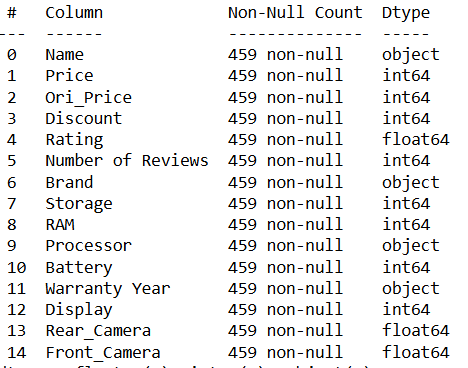

### 1. Tablet Price Distribution (Histogram)

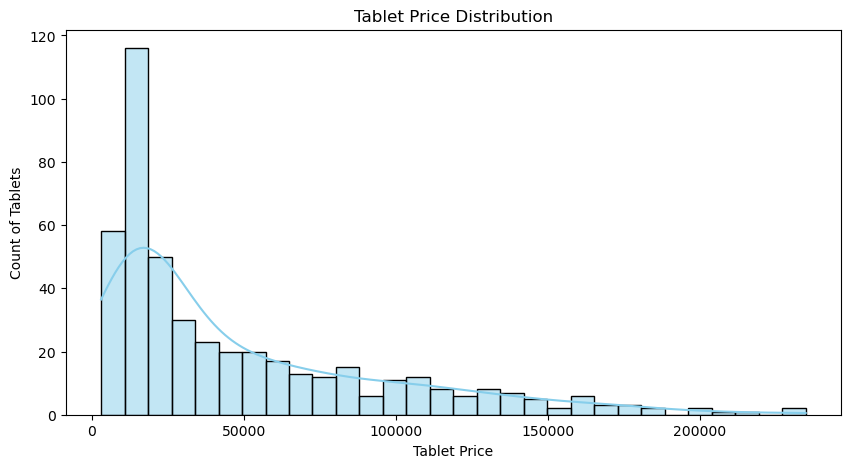

In [14]:
plt.figure(figsize=(10, 5))
sns.histplot(df["Price"], bins=30, kde=True, color="skyblue")
plt.xlabel("Tablet Price")
plt.ylabel("Count of Tablets")
plt.title("Tablet Price Distribution")
plt.savefig("Tablets_price_dis.png")
plt.show()

## 2.Tablet Prices w.r.t Brands (Boxplot)

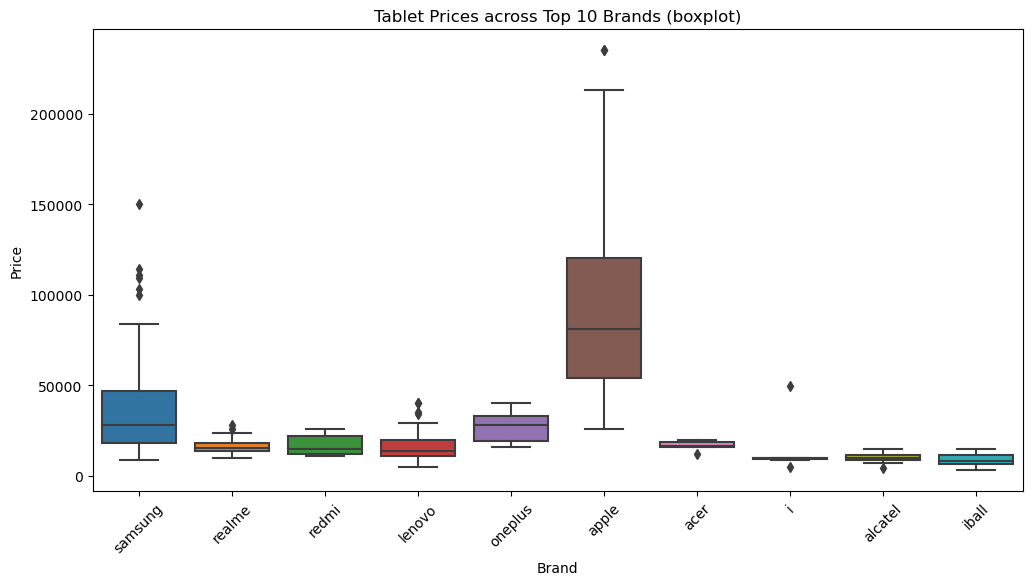

In [15]:
# Get top 10 brands
top_brands = df["Brand"].value_counts().head(10)

# Filter the data for top 10 brands
df_top_brands = df[df["Brand"].isin(top_brands.index)]

# Plot the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x="Brand", y="Price", data=df_top_brands)
plt.xticks(rotation=45)
plt.title("Tablet Prices across Top 10 Brands (boxplot)")
plt.savefig("Tablets_price w.r.t_brands.png")
plt.show()

#  3. Top 10 Tablet Brands by Number of Models (Bar Chart)

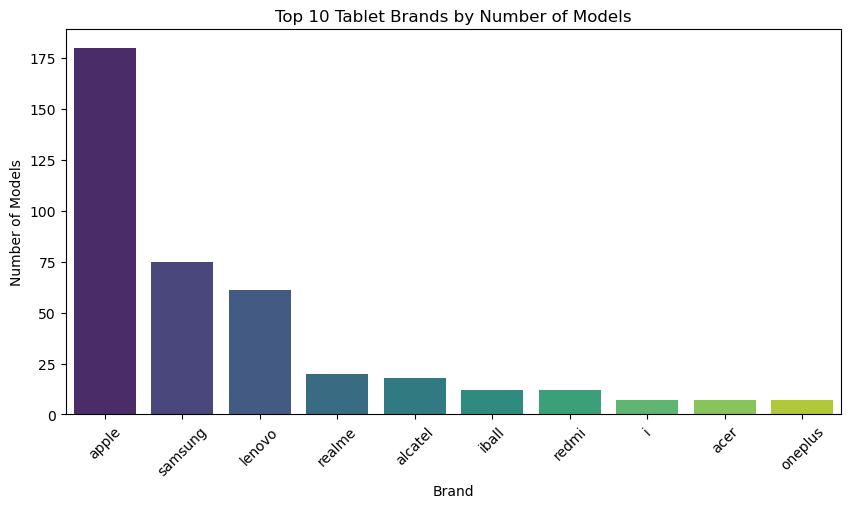

In [13]:
top_brands = df["Brand"].value_counts().head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_brands.index, y=top_brands.values, palette="viridis")
plt.xlabel("Brand")
plt.ylabel("Number of Models")
plt.title("Top 10 Tablet Brands by Number of Models")
plt.xticks(rotation=45)

# Save the figure
plt.savefig("Tablets_model_by_no_of_brand.png")

# Show the plot
plt.show()

 # 4. Impact of Ratings on Prices (Scatter Plot)

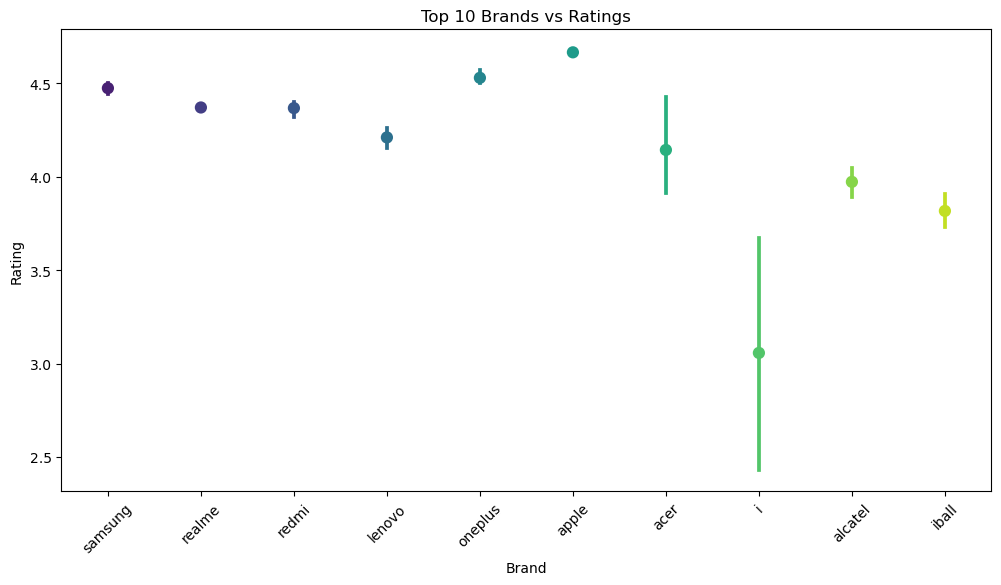

In [29]:
# Get top 10 brands based on the number of tablets
top_brands = df["Brand"].value_counts().head(10).index

# Filter the data to include only the top 10 brands
top_brands_df = df[df["Brand"].isin(top_brands)]

# Plot using pointplot
plt.figure(figsize=(12, 6))
sns.pointplot(x="Brand", y="Rating", data=top_brands_df, palette="viridis", markers="o", linestyles="")

# Customize plot
plt.xticks(rotation=45)
plt.xlabel("Brand")
plt.ylabel("Rating")
plt.title("Top 10 Brands vs Ratings")

# Save and show the plot
plt.savefig("Top_10_Brands_vs_Ratings_Point.png")
plt.show()

# 5. Correlation between Features and Price (Heatmap)

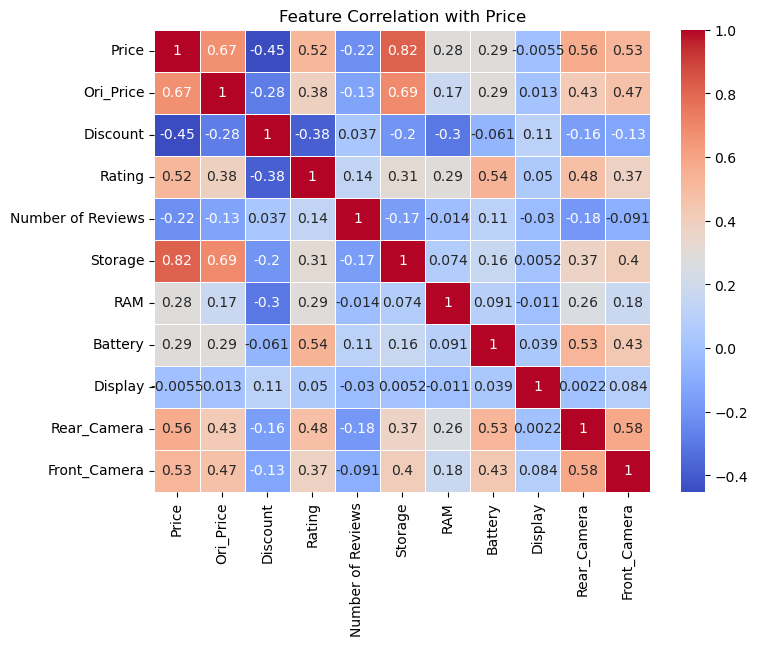

In [179]:
# Selecting only numeric columns for correlation
numeric_df = df.select_dtypes(include=[np.number])  

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation with Price")
plt.show()

# 8. Target Customers (Budget vs. Premium Buyers - Pie Chart)

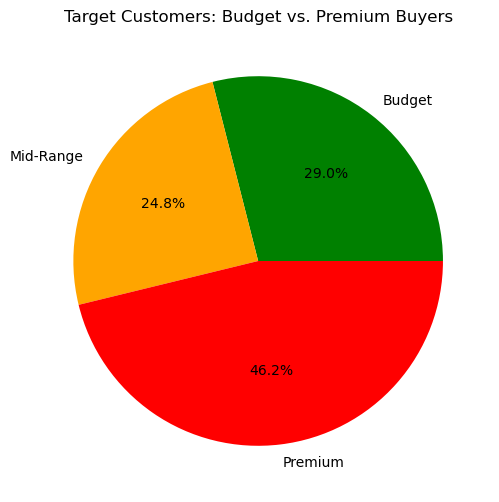

In [195]:
budget_count = df[df["Price"] < 15000].shape[0]
mid_range_count = df[(df["Price"] >= 15000) & (df["Price"] < 30000)].shape[0]
premium_count = df[df["Price"] >= 30000].shape[0]

plt.figure(figsize=(6, 6))
plt.pie([budget_count, mid_range_count, premium_count], labels=["Budget", "Mid-Range", "Premium"], autopct='%1.1f%%', colors=['green', 'orange', 'red'])
plt.title("Target Customers: Budget vs. Premium Buyers")
plt.show()